In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.datasets import
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = _california_housing.fetch_california_housing()

In [ ]:
df = pd.DataFrame(data.data)

In [ ]:
df.columns = data.feature_names

In [ ]:
df['Price'] = data.target

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

<ipython-input-37-d150db6f1384>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Price)


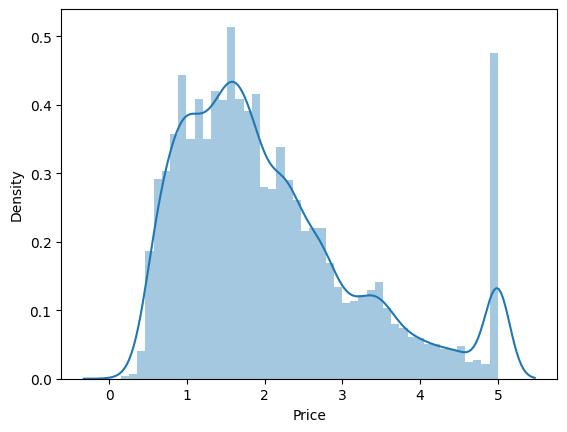

In [ ]:
sns.distplot(df.Price)
plt.show()

In [ ]:
x = df.drop('Price',axis = 1)
y = df['Price']

In [ ]:
#linear regression
lr = LinearRegression()
mse = cross_val_score(lr,x,y,scoring='r2',cv = 5)
mean_mse = np.mean(mse)
mean_mse

0.5530311140279569

In [ ]:
import sklearn
sklearn.metrics.get_scorer_names()

In [ ]:
#lasso
lasso = Lasso()
param = {'alpha':[1e-15,1e-10,1e-5,0.1,0,5,10,20,30,40,50,60,80,100]}
grid = GridSearchCV(lasso,param,scoring = 'r2',cv =5)

In [ ]:
grid.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.875e+03, tolerance: 2.228e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.076e+03, tolerance: 2.256e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.419e+03, tolerance: 2.110e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.1, 0, 5, 10, 20, 30,
                                   40, 50, 60, 80, 100]},
             scoring='r2')

In [ ]:
grid.best_params_,grid.best_score_

({'alpha': 1e-05}, 0.5530319498694087)

In [ ]:
lasso_model = grid.best_estimator_

In [ ]:
#ridge
ridge = Ridge()
param = {'alpha':[1e-15,1e-10,1e-5,0.1,0,5,10,20,30,40,50,60,80,100]}
grid_r = GridSearchCV(ridge,param,scoring = 'r2',cv =5)

In [ ]:
grid_r.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.1, 0, 5, 10, 20, 30,
                                   40, 50, 60, 80, 100]},
             scoring='r2')

In [ ]:
grid_r.best_params_,grid.best_score_

({'alpha': 80}, 0.5530319498694087)

In [ ]:
model_r = grid_r.best_estimator_

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.1,random_state = 42)

In [ ]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((18576, 8), (2064, 8), (18576,), (2064,))

In [ ]:
pred_r = model_r.predict(xtest)
pred_l = lasso_model.predict(xtest)

<ipython-input-72-243995d50c37>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytest,label = 'Actual')
<ipython-input-72-243995d50c37>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_r,label = 'Predicted')
<ipython-input-72-243995d50c37>:7: UserWarning: 

`distplot` is a deprecated funct

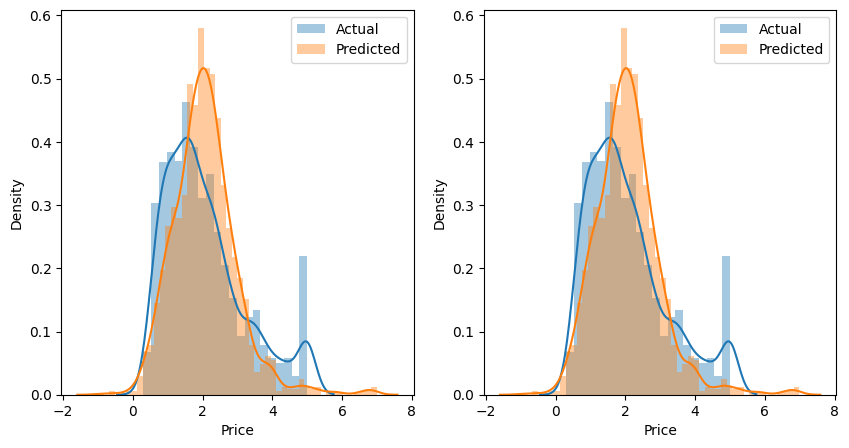

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(ytest,label = 'Actual')
sns.distplot(pred_r,label = 'Predicted')
plt.legend()
plt.subplot(1,2,2)
sns.distplot(ytest,label = 'Actual')
sns.distplot(pred_r,label = 'Predicted')
plt.legend()
plt.show()